## Ingest Data

I should formalize this via a function

In [2]:
import os
import pandas as pd

# collect all child files and join
files = os.listdir("../data")
files = [f for f in files if "fam" in f]

frames = []
for f in files:
    df = pd.read_csv(f"../data/{f}")
    frames.append(df)

fulldata = pd.concat(frames)

# "Counts less than 5 are masked with an asterisk (*) to protect the confidentiality of individuals in this report."
# will mark these as 0
impute_val = 2.5
fulldata = fulldata.replace(to_replace="*", value=impute_val)

# rename Reporting_Date for consistency with child data
fulldata.rename(columns={"ReportingDate": "Reporting_Date"}, inplace=True)

# set date as index
fulldata["Reporting_Date"] = pd.to_datetime(fulldata["Reporting_Date"])
fulldata.set_index("Reporting_Date", inplace=True)

fulldata = fulldata.apply(pd.to_numeric)

fulldata.sample(5).head()

,ZIPCode,ReasonCC_Emp,ReasonCC_Ed,ReasonCC_EmpEd,ReasonCC_PS,ReasonCC_FedEmEmp,ReasonCC_FedEmEd,ReasonCC_FedEmEmpEd,ReasonCC_FedEmPS,AvgFamilySize,...,PrimLang_3,PrimLang_4,PrimLang_5,PrimLang_6,PrimLang_7,PrimLang_8,PrimLang_9,PrimLang_10,PrimLang_11,PrimLang_12
Reporting_Date,,,,,,,,,,,,,,,,,,,,,
2021-05-01,76625,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,5,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
2023-02-01,77979,62.0,2.5,2.5,2.5,2.5,2.5,7.0,7.0,3,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
2022-09-01,76155,18.0,2.5,2.5,2.5,2.5,2.5,2.5,2.5,3,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
2024-02-01,79602,63.0,2.5,2.5,2.5,2.5,2.5,2.5,2.5,3,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
2022-03-01,78357,6.0,2.5,2.5,2.5,2.5,2.5,2.5,2.5,4,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5


## Univariate Analysis

Review univariate trends.

In [3]:
fulldata.shape

(65153, 26)

In [4]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65153 entries, 2021-01-01 to 2024-03-01
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZIPCode              65153 non-null  int64  
 1   ReasonCC_Emp         65153 non-null  float64
 2   ReasonCC_Ed          65153 non-null  float64
 3   ReasonCC_EmpEd       65153 non-null  float64
 4   ReasonCC_PS          65153 non-null  float64
 5   ReasonCC_FedEmEmp    65153 non-null  float64
 6   ReasonCC_FedEmEd     65153 non-null  float64
 7   ReasonCC_FedEmEmpEd  65153 non-null  float64
 8   ReasonCC_FedEmPS     65153 non-null  float64
 9   AvgFamilySize        65153 non-null  int64  
 10  AvgMonthlyIncome     65153 non-null  int64  
 11  SingleParent         65153 non-null  float64
 12  FamilyHomeless       65153 non-null  float64
 13  FamilyMilitary       65153 non-null  float64
 14  PrimLang_1           65153 non-null  float64
 15  PrimLang_2         

In [5]:
# select only Austin Zip codes
# chatGPT gave me wrong zip codes ... (78650) ) need to be more specific
austin_zip_codes = [
    73301, 73344, 78701, 78702, 78703, 78704, 78705, 78708,
    78709, 78710, 78711, 78712, 78713, 78714, 78715, 78716,
    78717, 78718, 78719, 78720, 78721, 78722, 78723, 78724,
    78725, 78726, 78727, 78728, 78729, 78730, 78731, 78732,
    78733, 78734, 78735, 78736, 78737, 78738, 78739, 78741,
    78742, 78744, 78745, 78746, 78747, 78748, 78749, 78750,
    78751, 78752, 78753, 78754, 78755, 78756, 78757, 78758,
    78759, 78760, 78761, 78762, 78763, 78764, 78765, 78766,
    78767, 78768, 78769, 78772, 78773, 78774, 78778, 78779,
    78783, 78799
]


austin = fulldata[fulldata["ZIPCode"].isin(austin_zip_codes)]

austin.shape

(1607, 26)

In [6]:
# check range of values
austin.describe()

,ZIPCode,ReasonCC_Emp,ReasonCC_Ed,ReasonCC_EmpEd,ReasonCC_PS,ReasonCC_FedEmEmp,ReasonCC_FedEmEd,ReasonCC_FedEmEmpEd,ReasonCC_FedEmPS,AvgFamilySize,...,PrimLang_3,PrimLang_4,PrimLang_5,PrimLang_6,PrimLang_7,PrimLang_8,PrimLang_9,PrimLang_10,PrimLang_11,PrimLang_12
count,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.0,1607.0,1607.000000,1607.000000,1607.000000,...,1607.0,1607.0,1607.0,1607.0,1607.0,1607.0,1607.0,1607.0,1607.0,1607.000000
mean,78734.644680,29.037959,2.805227,2.778780,3.422215,2.5,2.5,2.990355,2.990355,3.116366,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.504667
std,16.449101,31.104253,1.018061,0.991906,2.264606,0.0,0.0,1.774596,1.774596,0.637769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107950
min,78701.000000,2.500000,2.500000,2.500000,2.500000,2.5,2.5,2.500000,2.500000,2.000000,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.500000
25%,78724.000000,2.500000,2.500000,2.500000,2.500000,2.5,2.5,2.500000,2.500000,3.000000,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.500000
50%,78735.000000,19.000000,2.500000,2.500000,2.500000,2.5,2.5,2.500000,2.500000,3.000000,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.500000
75%,78748.000000,44.500000,2.500000,2.500000,2.500000,2.5,2.5,2.500000,2.500000,3.000000,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.500000
max,78779.000000,138.000000,10.000000,10.000000,19.000000,2.5,2.5,15.000000,15.000000,6.000000,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,5.000000


In [7]:
# find out how much data was imputed per date
(austin.T[austin.T == impute_val].count() / austin.T.count()).resample("Q").mean()

Reporting_Date
2021-03-31    0.784130
2021-06-30    0.778435
2021-09-30         NaN
2021-12-31    0.777674
2022-03-31    0.760088
2022-06-30    0.758912
2022-09-30    0.758599
2022-12-31         NaN
2023-03-31    0.768329
2023-06-30    0.771020
2023-09-30    0.770139
2023-12-31    0.778555
2024-03-31    0.779138
Freq: Q-DEC, dtype: float64

In [8]:
# check if each quarter has similar amount of zip codes
# if not, data is either faulty or you missed a dataset
austin.resample("Q")["ZIPCode"].nunique()

Reporting_Date
2021-03-31    37
2021-06-30    40
2021-09-30     0
2021-12-31    42
2022-03-31    41
2022-06-30    41
2022-09-30    42
2022-12-31     0
2023-03-31    43
2023-06-30    44
2023-09-30    45
2023-12-31    44
2024-03-31    45
Freq: Q-DEC, Name: ZIPCode, dtype: int64

In [9]:
# 2021 Q3 and 2022 Q4 are 2021 Q2 and 2022 Q2 respectively
c2021q3 = pd.read_csv("../data/fam2021q3.csv")
c2021q2 = pd.read_csv("../data/fam2021q2.csv")

c2021q3.equals(c2021q2)

True

In [10]:
# 2021 Q3 and 2022 Q4 are 2021 Q2 and 2022 Q2 respectively
c2022q4 = pd.read_csv("../data/fam2022q4.csv")
c2022q2 = pd.read_csv("../data/fam2022q2.csv")

c2022q4.equals(c2022q2)

True

In [11]:
austin_drop = austin.reset_index().drop_duplicates(subset=["Reporting_Date", "ZIPCode"]).set_index("Reporting_Date")

austin_drop.shape
# lost ~300 rows

(1367, 26)

<ipython-input-12-bd04708319c6>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  austin_drop.drop(columns="ZIPCode").hist(ax=axis)


array([[<AxesSubplot:title={'center':'ReasonCC_Emp'}>,
        <AxesSubplot:title={'center':'ReasonCC_Ed'}>,
        <AxesSubplot:title={'center':'ReasonCC_EmpEd'}>,
        <AxesSubplot:title={'center':'ReasonCC_PS'}>,
        <AxesSubplot:title={'center':'ReasonCC_FedEmEmp'}>],
       [<AxesSubplot:title={'center':'ReasonCC_FedEmEd'}>,
        <AxesSubplot:title={'center':'ReasonCC_FedEmEmpEd'}>,
        <AxesSubplot:title={'center':'ReasonCC_FedEmPS'}>,
        <AxesSubplot:title={'center':'AvgFamilySize'}>,
        <AxesSubplot:title={'center':'AvgMonthlyIncome'}>],
       [<AxesSubplot:title={'center':'SingleParent'}>,
        <AxesSubplot:title={'center':'FamilyHomeless'}>,
        <AxesSubplot:title={'center':'FamilyMilitary'}>,
        <AxesSubplot:title={'center':'PrimLang_1'}>,
        <AxesSubplot:title={'center':'PrimLang_2'}>],
       [<AxesSubplot:title={'center':'PrimLang_3'}>,
        <AxesSubplot:title={'center':'PrimLang_4'}>,
        <AxesSubplot:title={'center':'Pri

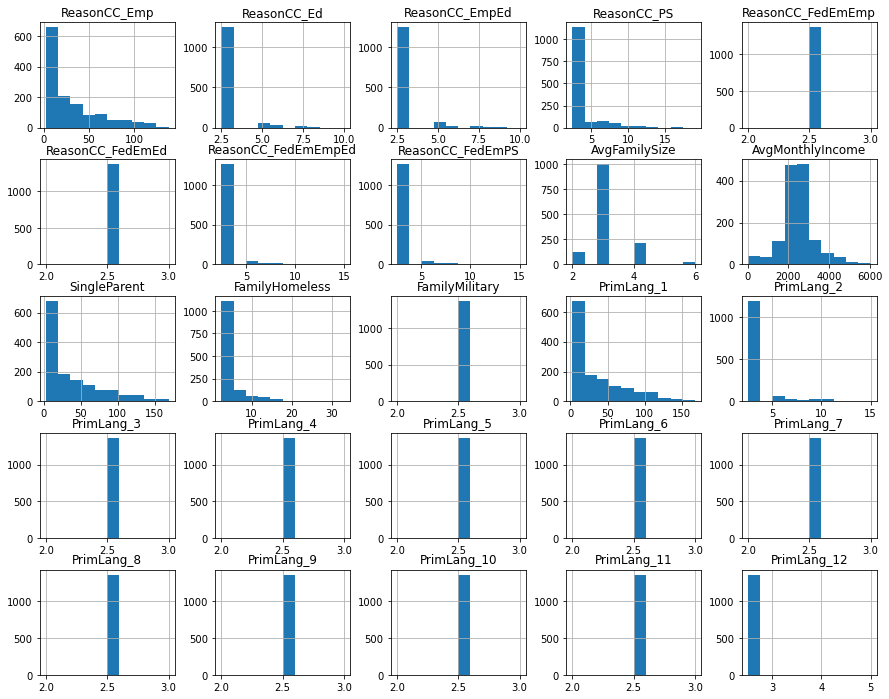

In [12]:
import matplotlib.pyplot as plt

# plot histograms of each column
fig, axis = plt.subplots(figsize=(15, 12))
austin_drop.drop(columns="ZIPCode").hist(ax=axis)

In [13]:
counts = austin_drop[["ReasonCC_Emp", "ReasonCC_Ed", "ReasonCC_EmpEd", "ReasonCC_PS", "ReasonCC_FedEmEmp", "ReasonCC_FedEmEd", "ReasonCC_FedEmEmpEd", "ReasonCC_FedEmPS"]].sum()

tot = counts.sum()

counts / tot * 100
# 60% of data (considering imputed censored data is "employment")
# ReasonCC_Emp --> Count: Reason for Receiving Child Care-Employment

ReasonCC_Emp           59.571961
ReasonCC_Ed             5.744966
ReasonCC_EmpEd          5.718867
ReasonCC_PS             6.873229
ReasonCC_FedEmEmp       5.096943
ReasonCC_FedEmEd        5.096943
ReasonCC_FedEmEmpEd     5.948546
ReasonCC_FedEmPS        5.948546
dtype: float64

In [14]:
# find out how much data was imputed per column
austin_drop[austin_drop == impute_val].count() / austin_drop.count()

ZIPCode                0.000000
ReasonCC_Emp           0.333577
ReasonCC_Ed            0.907096
ReasonCC_EmpEd         0.909290
ReasonCC_PS            0.827359
ReasonCC_FedEmEmp      1.000000
ReasonCC_FedEmEd       1.000000
ReasonCC_FedEmEmpEd    0.920995
ReasonCC_FedEmPS       0.920995
AvgFamilySize          0.000000
AvgMonthlyIncome       0.000000
SingleParent           0.296269
FamilyHomeless         0.765179
FamilyMilitary         1.000000
PrimLang_1             0.300658
PrimLang_2             0.874909
PrimLang_3             1.000000
PrimLang_4             1.000000
PrimLang_5             1.000000
PrimLang_6             1.000000
PrimLang_7             1.000000
PrimLang_8             1.000000
PrimLang_9             1.000000
PrimLang_10            1.000000
PrimLang_11            1.000000
PrimLang_12            0.997805
dtype: float64

In [15]:
# drop columns
cols = (austin_drop[austin_drop == impute_val].count() / austin_drop.count() <= 0.8)
names = list(cols[cols].index)

sel_austin = austin_drop[names]
sel_austin.head()

,ZIPCode,ReasonCC_Emp,AvgFamilySize,AvgMonthlyIncome,SingleParent,FamilyHomeless,PrimLang_1
Reporting_Date,,,,,,,
2021-01-01,78702,35.0,3,2057,42.0,2.5,43.0
2021-02-01,78702,33.0,3,2086,39.0,2.5,40.0
2021-03-01,78702,37.0,3,2069,44.0,2.5,46.0
2021-01-01,78703,2.5,2,3198,2.5,2.5,2.5
2021-02-01,78703,2.5,2,3198,2.5,2.5,2.5


In [16]:
sel_austin.shape

(1367, 7)

In [17]:
import numpy as np

# let's take a look at monthly counts according to ZIP code to see if imputation might be appropriate
zipcodes = sel_austin.groupby(["ZIPCode"]).resample("1M").mean().drop(columns=["ZIPCode"]).reset_index().set_index("Reporting_Date")

# sample random groups
rand_zips = zipcodes["ZIPCode"].unique()
np.random.shuffle(rand_zips)

zipcodes_rand = zipcodes[zipcodes["ZIPCode"].isin(rand_zips[:5])]

zipcodes_emp = zipcodes_rand[["ZIPCode", "ReasonCC_Emp"]]

zipcodes_hom = zipcodes_rand[["ZIPCode", "FamilyHomeless"]]

zipcodes_income = zipcodes_rand[["ZIPCode", "AvgMonthlyIncome"]]
zipcodes_single = zipcodes_rand[["ZIPCode", "SingleParent"]]
zipcodes_famsize = zipcodes_rand[["ZIPCode", "AvgFamilySize"]]

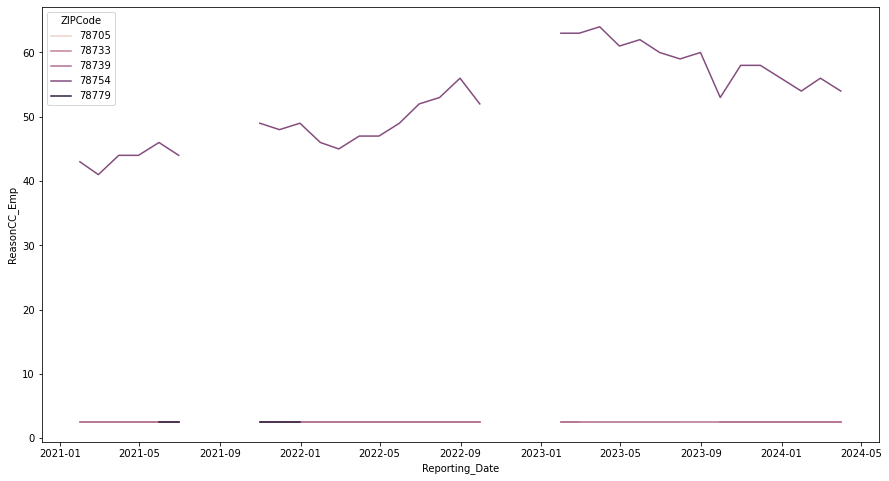

In [18]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_emp, x=zipcodes_emp.index, y="ReasonCC_Emp", hue="ZIPCode")
plt.show()

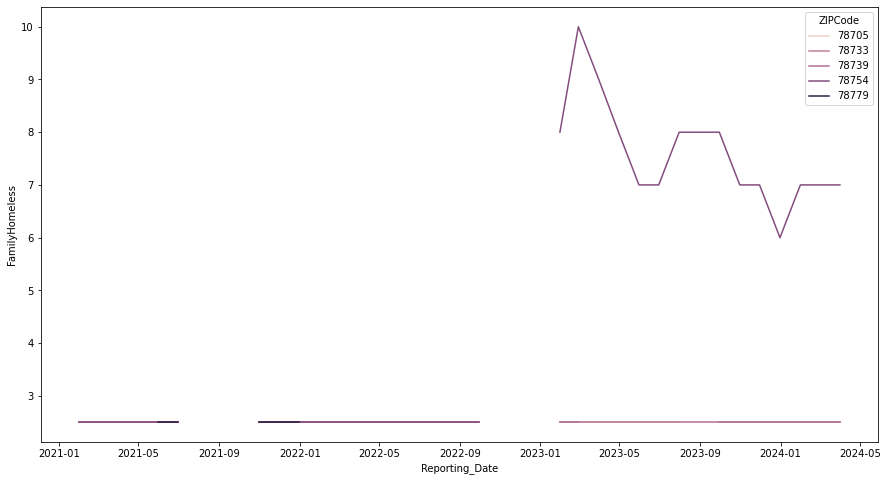

In [19]:
plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_hom, x=zipcodes_hom.index, y="FamilyHomeless", hue="ZIPCode")
plt.show()

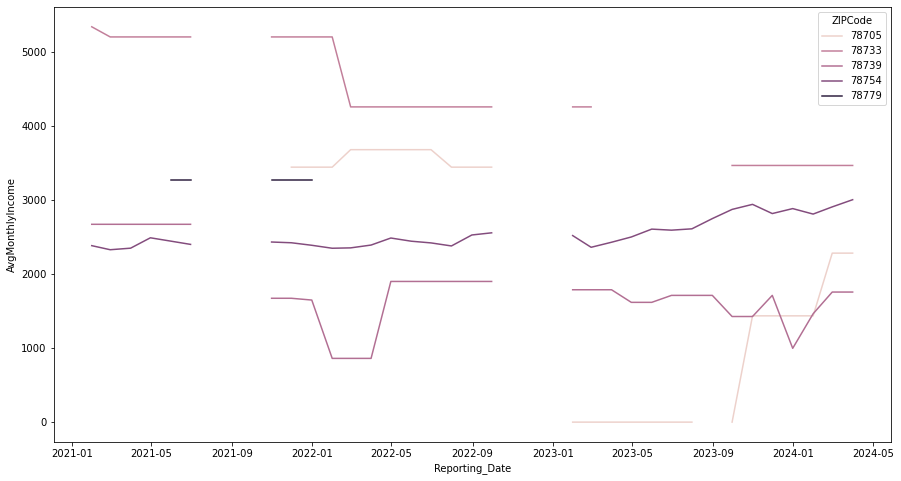

In [20]:
plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_income, x=zipcodes_income.index, y="AvgMonthlyIncome", hue="ZIPCode")
plt.show()

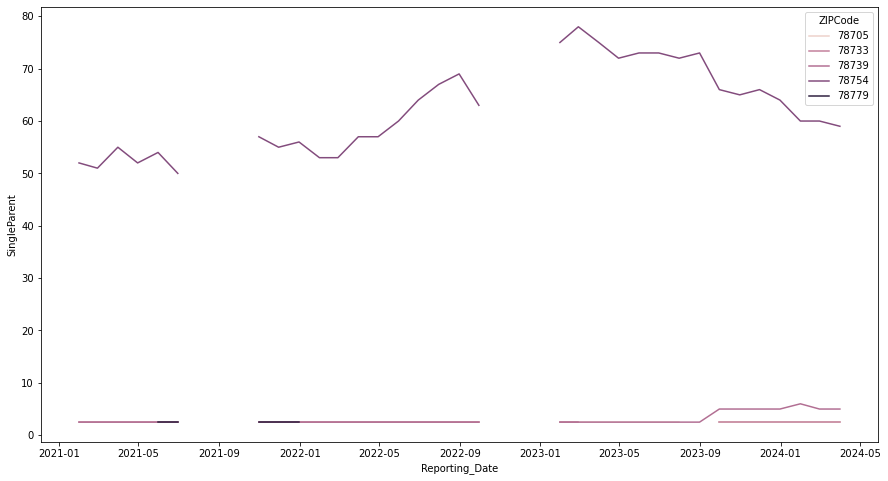

In [21]:
plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_single, x=zipcodes_single.index, y="SingleParent", hue="ZIPCode")
plt.show()

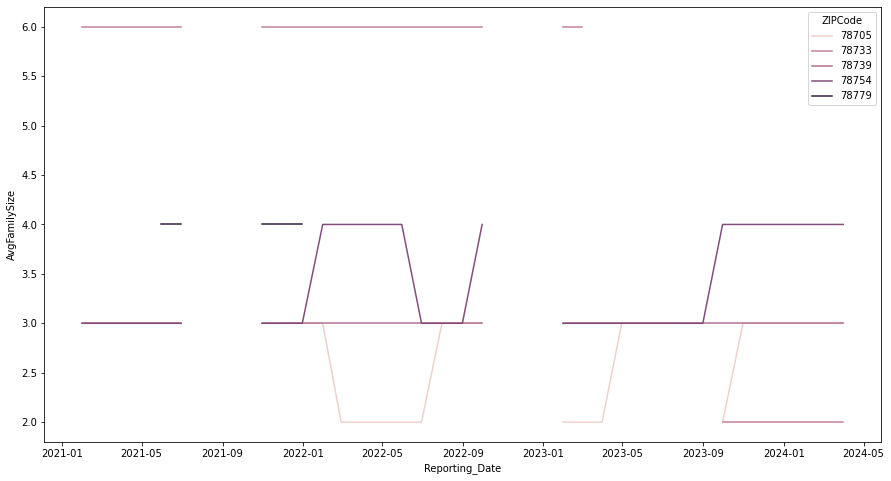

In [22]:
plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_famsize, x=zipcodes_famsize.index, y="AvgFamilySize", hue="ZIPCode")
plt.show()

## Impute the Data 

Impute missing data

In [23]:
# select guaranteed non-null dates and join together
df1 = zipcodes.loc['2021-01-31':'2021-06-30'] 
df2 = zipcodes.loc['2021-10-31':'2022-09-30']
df3 = zipcodes.loc['2023-01-31':]

nonnull_frames = pd.concat([df1, df2, df3])

In [24]:
# select ZIP codes that are ONLY present across all months! (33 months in total)
valid_zips = (nonnull_frames.groupby("ZIPCode").count() == 33).all(axis=1)

val_zipnames = list(valid_zips[valid_zips].index)

valzip_frame = zipcodes[zipcodes["ZIPCode"].isin(val_zipnames)]

valzip_frame

,ZIPCode,ReasonCC_Emp,AvgFamilySize,AvgMonthlyIncome,SingleParent,FamilyHomeless,PrimLang_1
Reporting_Date,,,,,,,
2021-01-31,78702,35.0,3.0,2057.0,42.0,2.5,43.0
2021-02-28,78702,33.0,3.0,2086.0,39.0,2.5,40.0
2021-03-31,78702,37.0,3.0,2069.0,44.0,2.5,46.0
2021-04-30,78702,37.0,3.0,1968.0,47.0,2.5,48.0
2021-05-31,78702,42.0,3.0,2048.0,52.0,2.5,52.0
...,...,...,...,...,...,...,...
2023-11-30,78759,23.0,3.0,2623.0,28.0,6.0,26.0
2023-12-31,78759,23.0,3.0,2570.0,26.0,6.0,25.0
2024-01-31,78759,26.0,3.0,2704.0,27.0,5.0,27.0


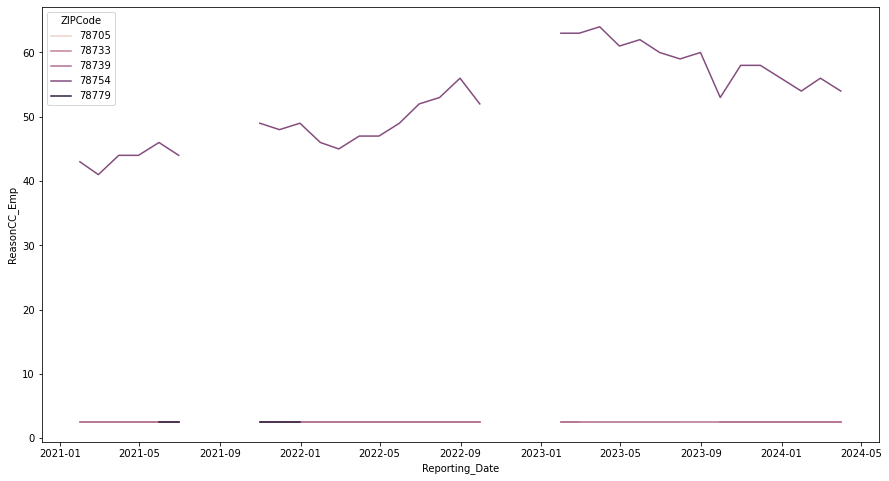

In [25]:
# plot again and notice that previous zip with mostly missing data no longer there
zipcodes_rand = valzip_frame[valzip_frame["ZIPCode"].isin(rand_zips[:5])]
zipcodes_latino = zipcodes_rand[["ZIPCode", "ReasonCC_Emp"]]

plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_emp, x=zipcodes_emp.index, y="ReasonCC_Emp", hue="ZIPCode")
plt.show()

In [26]:
valzip_frame.isna().sum()

ZIPCode               0
ReasonCC_Emp        198
AvgFamilySize       198
AvgMonthlyIncome    198
SingleParent        198
FamilyHomeless      198
PrimLang_1          198
dtype: int64

In [27]:
# get ZIPS
valid_zips = valzip_frame["ZIPCode"].unique()

# get value columns
val_names = valzip_frame.drop(columns="ZIPCode").columns

# replace missing data with ... for each ZIP code

est_zip = valzip_frame.copy(deep=True)

for zip in valid_zips:
    zip_data = est_zip[est_zip["ZIPCode"] == zip]
    
    for name in val_names:
        # apply imputation method
        imputed_data = zip_data[name].interpolate(method='time')
        est_zip.loc[est_zip["ZIPCode"] == zip, name] = imputed_data

In [28]:
est_zip.shape

(1287, 7)

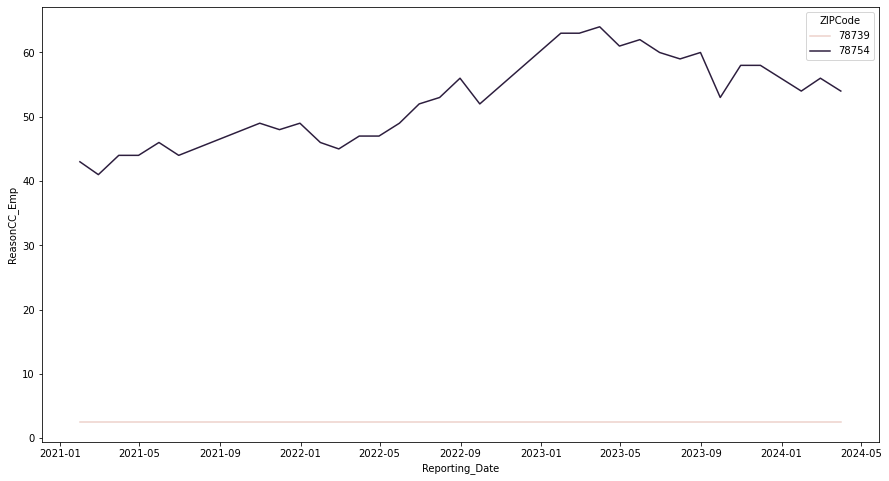

In [29]:
# plot again and notice imputed data
zipcodes_rand = est_zip[est_zip["ZIPCode"].isin(rand_zips[:5])]
zipcodes_emp = zipcodes_rand[["ZIPCode", "ReasonCC_Emp"]]

plt.figure(figsize=(15,8))
sns.lineplot(data=zipcodes_emp, x=zipcodes_emp.index, y="ReasonCC_Emp", hue="ZIPCode")
plt.show()

In [30]:
# write dataset for persistence (will rewrite transformation steps regardless)

est_zip.to_csv("../data/transformed/family_zip.csv")

Text(0, 0.5, 'Average Family Size')

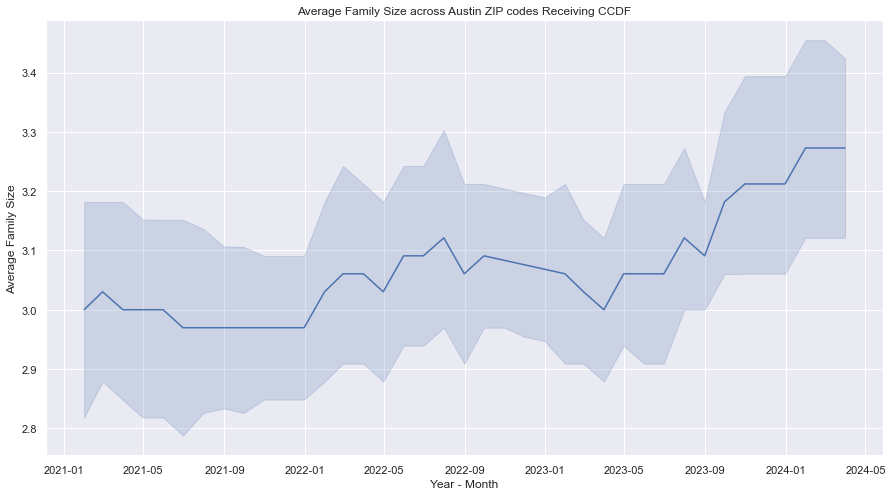

In [79]:
import matplotlib.pyplot as plt, seaborn as sns 

# calc average and get confidence intervals
means = est_zip["AvgFamilySize"]

plt.figure(figsize=(15,8))
sns.set_theme()
sns.lineplot(x=est_zip.index, y=means)

plt.title("Average Family Size across Austin ZIP codes Receiving CCDF")
plt.xlabel("Year - Month")
plt.ylabel("Average Family Size")

Text(0, 0.5, 'Average Income')

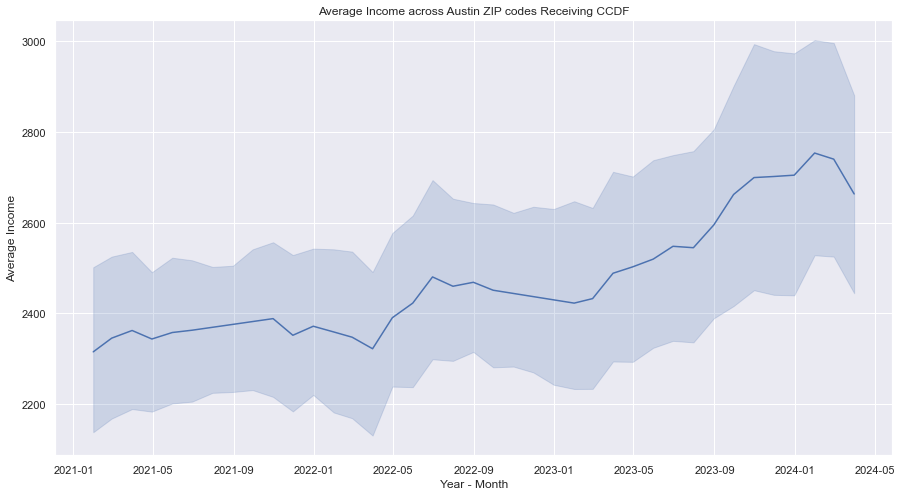

In [81]:
plt.figure(figsize=(15,8))

sns.lineplot(x=est_zip.index, y=est_zip["AvgMonthlyIncome"])

plt.title("Average Income across Austin ZIP codes Receiving CCDF")
plt.xlabel("Year - Month")
plt.ylabel("Average Income")

In [82]:
# calculate average change from beginning date to date
mean_income = est_zip.groupby(est_zip.index)["AvgMonthlyIncome"].mean()
overall_change = (mean_income[-1] - mean_income[0])/mean_income[0] * 100

print("change from beginning of Q1 2021 to end of Q1 2024 =", round(overall_change, 2), "%")
print(round(mean_income[-1], 2), "<--", round(mean_income[0], 2))

change from beginning of Q1 2021 to end of Q1 2024 = 15.05 %
2663.58 <-- 2315.18


In [83]:
# adjust for inflation
inflation = pd.read_csv("../data/CPIAUCNS.csv")

inflation['multiplier'] = inflation['CPIAUCNS'].iloc[-1] / inflation['CPIAUCNS']
inflation["DATE"] = pd.to_datetime(inflation["DATE"])

inflation.set_index("DATE", inplace=True)

inflation

,CPIAUCNS,multiplier
DATE,,
1913-01-01,9.800,32.058673
1913-02-01,9.800,32.058673
1913-03-01,9.800,32.058673
1913-04-01,9.800,32.058673
1913-05-01,9.700,32.389175
...,...,...
2024-02-01,310.326,1.012403
2024-03-01,312.332,1.005901
2024-04-01,313.548,1.002000


In [84]:
inflation = inflation.resample('1M')["multiplier"].mean()

inflation_frame = inflation.to_frame().reset_index()

In [85]:
inflation_frame.rename(columns={"DATE": "Reporting_Date"}, inplace=True)

inflation_frame

,Reporting_Date,multiplier
0,1913-01-31,32.058673
1,1913-02-28,32.058673
2,1913-03-31,32.058673
3,1913-04-30,32.058673
4,1913-05-31,32.389175
...,...,...
1333,2024-02-29,1.012403
1334,2024-03-31,1.005901
1335,2024-04-30,1.002000
1336,2024-05-31,1.000338


In [86]:
# adjust for inflation

merged_income = pd.merge(est_zip, inflation_frame, on=["Reporting_Date"])

merged_income.set_index("Reporting_Date", inplace=True)

merged_income["adjusted_income"] = merged_income["AvgMonthlyIncome"] * merged_income["multiplier"]
merged_income

,ZIPCode,ReasonCC_Emp,AvgFamilySize,AvgMonthlyIncome,SingleParent,FamilyHomeless,PrimLang_1,multiplier,adjusted_income
Reporting_Date,,,,,,,,,
2021-01-31,78702,35.0,3.0,2057.0,42.0,2.5,43.0,1.201057,2470.575097
2021-01-31,78703,2.5,2.0,3198.0,2.5,2.5,2.5,1.201057,3840.981604
2021-01-31,78704,27.0,3.0,2110.0,34.0,2.5,34.0,1.201057,2534.231140
2021-01-31,78717,8.0,3.0,2436.0,9.0,2.5,7.0,1.201057,2925.775856
2021-01-31,78721,21.0,4.0,2177.0,27.0,2.5,29.0,1.201057,2614.701986
...,...,...,...,...,...,...,...,...,...
2024-03-31,78753,115.0,3.0,2125.0,151.0,26.0,146.0,1.005901,2137.539141
2024-03-31,78754,54.0,4.0,3001.0,59.0,7.0,59.0,1.005901,3018.708218
2024-03-31,78757,12.0,3.0,3425.0,11.0,2.5,12.0,1.005901,3445.210145


Text(0, 0.5, 'Adjusted Average Income')

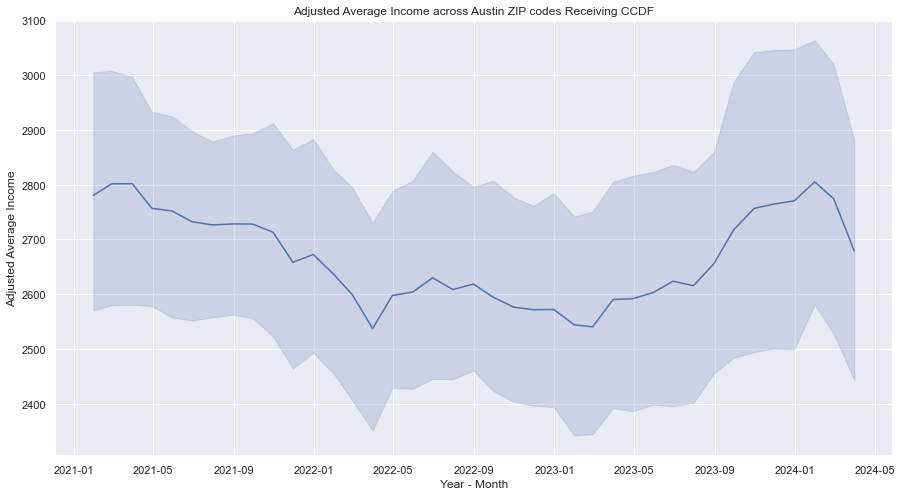

In [87]:
plt.figure(figsize=(15,8))

sns.lineplot(x=merged_income.index, y=merged_income["adjusted_income"])

plt.title("Adjusted Average Income across Austin ZIP codes Receiving CCDF")
plt.xlabel("Year - Month")
plt.ylabel("Adjusted Average Income")

In [88]:
# calculate average change from beginning date to date
mean_income = merged_income.groupby(merged_income.index)["adjusted_income"].mean()
overall_change = (mean_income[-1] - mean_income[0])/mean_income[0] * 100

print("change from beginning of Q1 2021 to end of Q1 2024 =", round(overall_change, 2), "%")
print(round(mean_income[-1], 2), "<--", round(mean_income[0], 2))

change from beginning of Q1 2021 to end of Q1 2024 = -3.65 %
2679.29 <-- 2780.67


Text(0, 0.5, 'Average Counts')

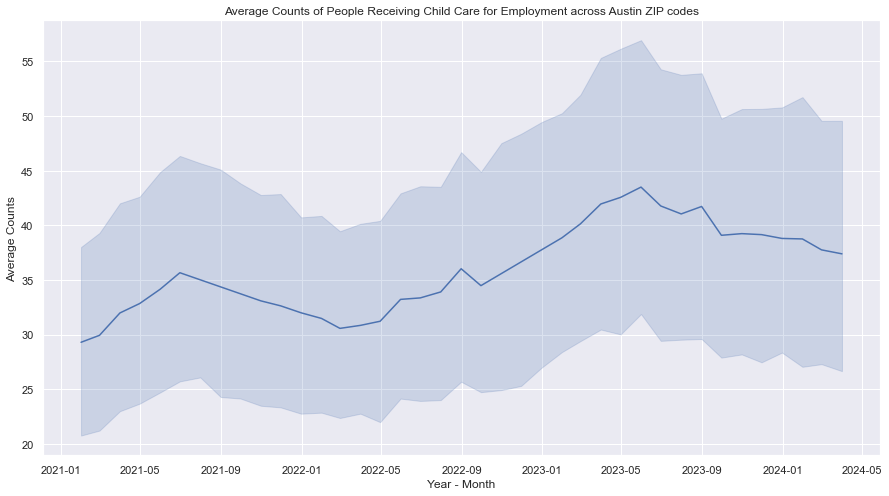

In [89]:
plt.figure(figsize=(15,8))

sns.set_style()

sns.lineplot(x=est_zip.index, y=est_zip["ReasonCC_Emp"])

plt.title("Average Counts of People Receiving Child Care for Employment across Austin ZIP codes")
plt.xlabel("Year - Month")
plt.ylabel("Average Counts")

Text(0, 0.5, 'Average Counts')

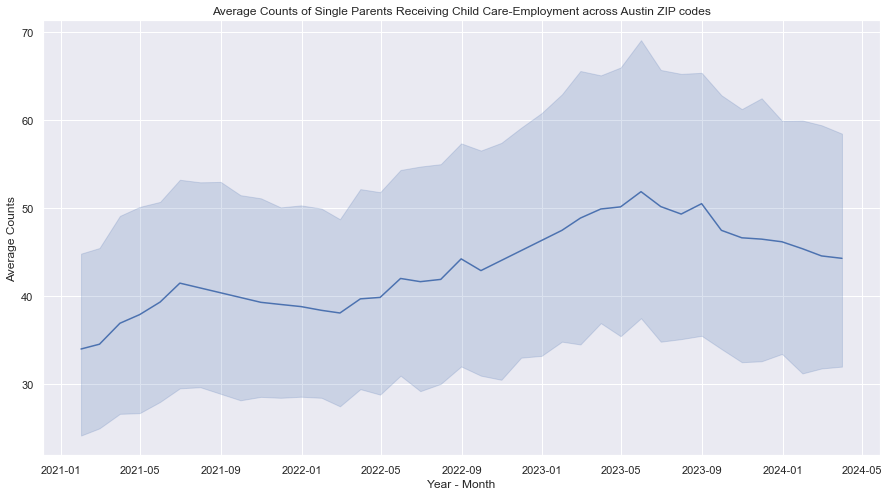

In [90]:
plt.figure(figsize=(15,8))

sns.lineplot(x=est_zip.index, y=est_zip["SingleParent"])

plt.title("Average Counts of Single Parents Receiving Child Care-Employment across Austin ZIP codes")
plt.xlabel("Year - Month")
plt.ylabel("Average Counts")

Text(0, 0.5, 'Average Counts')

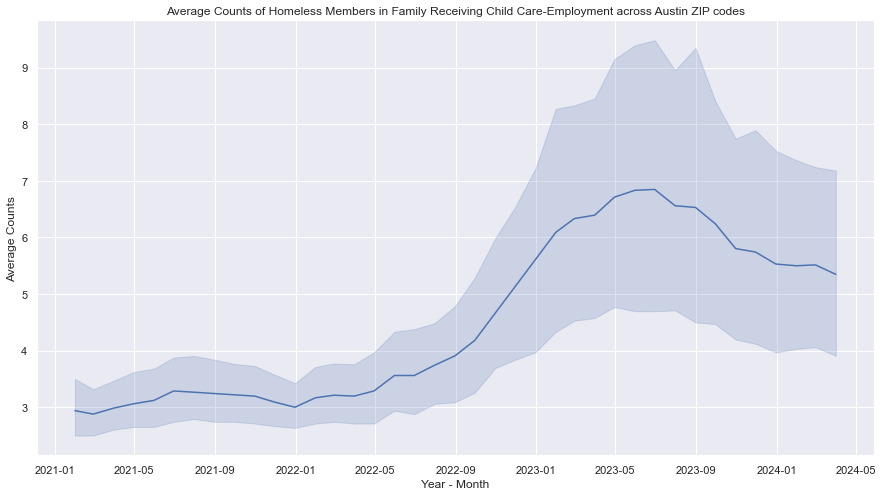

In [91]:
plt.figure(figsize=(15,8))

sns.lineplot(x=est_zip.index, y=est_zip["FamilyHomeless"])

plt.title("Average Counts of Homeless Members in Family Receiving Child Care-Employment across Austin ZIP codes")
plt.xlabel("Year - Month")
plt.ylabel("Average Counts")

In [92]:
# calculate average change from beginning date to date
mean_homeless = est_zip.groupby(est_zip.index)["FamilyHomeless"].mean()
overall_change = (mean_homeless[-1] - mean_homeless[0])/mean_homeless[0] * 100

print("change from beginning of Q1 2021 to end of Q1 2024 =", round(overall_change, 2), "%")
print(round(mean_homeless[-1], 2), "<--", round(mean_homeless[0], 2))

change from beginning of Q1 2021 to end of Q1 2024 = 81.96 %
5.35 <-- 2.94


## Join with Child Data to view Correlations

In [93]:
child_data = pd.read_csv("../data/transformed/child_zip.csv")

child_data["Reporting_Date"] = pd.to_datetime(child_data["Reporting_Date"])

child_data.head()

,Reporting_Date,ZIPCode,ChildEthnicityHispLatino,ChildRaceBlackAfriAmer,ChildRaceWhite,ChildRaceMult,ChildMale,ChildFemale,ChildAgeInfantToddler,ChildAgePrek,ChildAgeSchAge
0,2021-01-31,78702,21.0,46.0,19.0,5.0,44.0,28.0,26.0,32.0,14.0
1,2021-02-28,78702,20.0,43.0,18.0,5.0,39.0,29.0,21.0,34.0,13.0
2,2021-03-31,78702,21.0,45.0,22.0,2.5,42.0,31.0,25.0,34.0,14.0
3,2021-04-30,78702,23.0,49.0,22.0,2.5,46.0,31.0,28.0,34.0,15.0
4,2021-05-31,78702,28.0,50.0,27.0,2.5,50.0,33.0,27.0,39.0,17.0


In [94]:
est_zip.head()

,ZIPCode,ReasonCC_Emp,AvgFamilySize,AvgMonthlyIncome,SingleParent,FamilyHomeless,PrimLang_1
Reporting_Date,,,,,,,
2021-01-31,78702,35.0,3.0,2057.0,42.0,2.5,43.0
2021-02-28,78702,33.0,3.0,2086.0,39.0,2.5,40.0
2021-03-31,78702,37.0,3.0,2069.0,44.0,2.5,46.0
2021-04-30,78702,37.0,3.0,1968.0,47.0,2.5,48.0
2021-05-31,78702,42.0,3.0,2048.0,52.0,2.5,52.0


In [95]:
est_zip.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1287 entries, 2021-01-31 to 2024-03-31
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ZIPCode           1287 non-null   int64  
 1   ReasonCC_Emp      1287 non-null   float64
 2   AvgFamilySize     1287 non-null   float64
 3   AvgMonthlyIncome  1287 non-null   float64
 4   SingleParent      1287 non-null   float64
 5   FamilyHomeless    1287 non-null   float64
 6   PrimLang_1        1287 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 80.4 KB


In [96]:
child_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Reporting_Date            1287 non-null   datetime64[ns]
 1   ZIPCode                   1287 non-null   int64         
 2   ChildEthnicityHispLatino  1287 non-null   float64       
 3   ChildRaceBlackAfriAmer    1287 non-null   float64       
 4   ChildRaceWhite            1287 non-null   float64       
 5   ChildRaceMult             1287 non-null   float64       
 6   ChildMale                 1287 non-null   float64       
 7   ChildFemale               1287 non-null   float64       
 8   ChildAgeInfantToddler     1287 non-null   float64       
 9   ChildAgePrek              1287 non-null   float64       
 10  ChildAgeSchAge            1287 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 110.7 KB


In [97]:
joined_data = pd.merge(child_data, est_zip, on=["Reporting_Date", "ZIPCode"])

joined_data

,Reporting_Date,ZIPCode,ChildEthnicityHispLatino,ChildRaceBlackAfriAmer,ChildRaceWhite,ChildRaceMult,ChildMale,ChildFemale,ChildAgeInfantToddler,ChildAgePrek,ChildAgeSchAge,ReasonCC_Emp,AvgFamilySize,AvgMonthlyIncome,SingleParent,FamilyHomeless,PrimLang_1
0,2021-01-31,78702,21.0,46.0,19.0,5.0,44.0,28.0,26.0,32.0,14.0,35.0,3.0,2057.0,42.0,2.5,43.0
1,2021-02-28,78702,20.0,43.0,18.0,5.0,39.0,29.0,21.0,34.0,13.0,33.0,3.0,2086.0,39.0,2.5,40.0
2,2021-03-31,78702,21.0,45.0,22.0,2.5,42.0,31.0,25.0,34.0,14.0,37.0,3.0,2069.0,44.0,2.5,46.0
3,2021-04-30,78702,23.0,49.0,22.0,2.5,46.0,31.0,28.0,34.0,15.0,37.0,3.0,1968.0,47.0,2.5,48.0
4,2021-05-31,78702,28.0,50.0,27.0,2.5,50.0,33.0,27.0,39.0,17.0,42.0,3.0,2048.0,52.0,2.5,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,2023-11-30,78759,16.0,15.0,25.0,2.5,23.0,22.0,13.0,16.0,16.0,23.0,3.0,2623.0,28.0,6.0,26.0
1283,2023-12-31,78759,16.0,14.0,25.0,2.5,23.0,21.0,13.0,15.0,16.0,23.0,3.0,2570.0,26.0,6.0,25.0
1284,2024-01-31,78759,20.0,14.0,25.0,2.5,23.0,22.0,14.0,16.0,15.0,26.0,3.0,2704.0,27.0,5.0,27.0
1285,2024-02-29,78759,20.0,12.0,25.0,2.5,23.0,20.0,14.0,16.0,13.0,24.0,3.0,2731.0,26.0,5.0,26.0


In [98]:
joined_data.isna().sum()

Reporting_Date              0
ZIPCode                     0
ChildEthnicityHispLatino    0
ChildRaceBlackAfriAmer      0
ChildRaceWhite              0
ChildRaceMult               0
ChildMale                   0
ChildFemale                 0
ChildAgeInfantToddler       0
ChildAgePrek                0
ChildAgeSchAge              0
ReasonCC_Emp                0
AvgFamilySize               0
AvgMonthlyIncome            0
SingleParent                0
FamilyHomeless              0
PrimLang_1                  0
dtype: int64

In [99]:
selected_cols = joined_data.drop(columns=["ZIPCode", "ChildMale", "ChildFemale", "ChildEthnicityHispLatino", "ChildRaceBlackAfriAmer", "ChildRaceWhite", "ChildRaceMult", "PrimLang_1"])

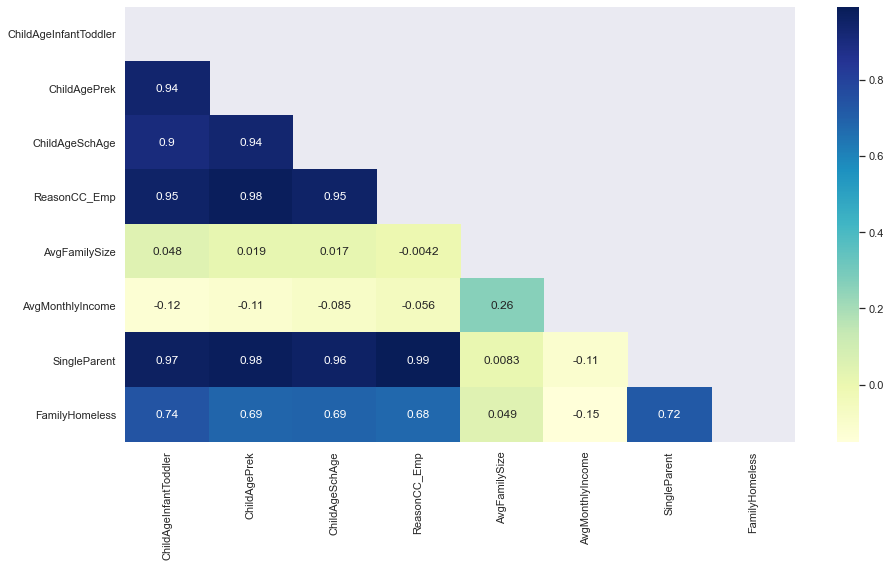

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.triu(np.ones_like(selected_cols.corr())) 

plt.figure(figsize=(15,8))
dataplot = sns.heatmap(selected_cols.corr(), cmap="YlGnBu", annot=True, mask=mask) 

# displaying heatmap 
plt.show() 